In [38]:
%matplotlib inline

In [59]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from config import POP_DATA_SRC

In [41]:
target = xr.open_dataset(str(POP_DATA_SRC / 'histsoc_population_0.5deg_1861-2005.nc4'), 
                         decode_times=False
                        )
target = target.rename({'lon':'longitude', 'lat':'latitude'})
target

<xarray.Dataset>
Dimensions:           (latitude: 360, longitude: 720, time: 145)
Coordinates:
  * longitude         (longitude) float64 -179.8 -179.2 -178.8 -178.2 -177.8 ...
  * latitude          (latitude) float64 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * time              (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
Data variables:
    number_of_people  (time, latitude, longitude) float64 0.0 0.0 0.0 0.0 ...
Attributes:
    CDI:                       Climate Data Interface version 1.7.2 (http://m...
    Conventions:               CF-1.4
    NCO:                       20161020
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.7.2 (http://m...

In [42]:
target['time'] = pd.date_range('1861', periods=len(target.time), freq='AS')
target = target.rename({'time':'year'})
target['year'] = target['year.year']

In [55]:
target['number_of_people'] = target.number_of_people.astype(int)

In [46]:
width = target.number_of_people.shape[2]
target['number_of_people'] = (['year','latitude','longitude'] , np.roll(target.number_of_people, -width//2, axis=2))

In [48]:
target['longitude'] +=180

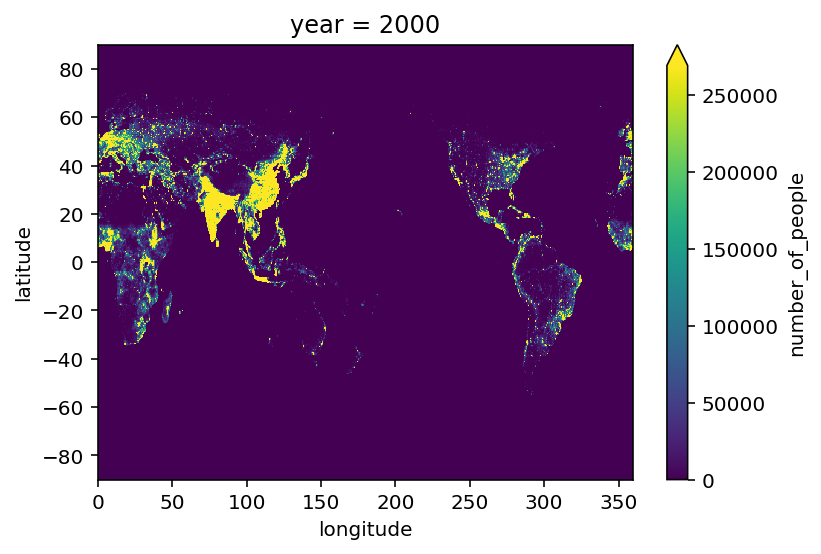

In [56]:
target.sel(year=2000).number_of_people.plot(robust=True)

In [57]:
target.to_netcdf(str(POP_DATA_SRC / 'histsoc_population_0.5deg_1861-2005_.nc'))

In [54]:
target

<xarray.Dataset>
Dimensions:           (latitude: 360, longitude: 720, year: 145)
Coordinates:
  * longitude         (longitude) float64 0.25 0.75 1.25 1.75 2.25 2.75 3.25 ...
  * latitude          (latitude) float64 89.75 89.25 88.75 88.25 87.75 87.25 ...
  * year              (year) int64 1861 1862 1863 1864 1865 1866 1867 1868 ...
Data variables:
    number_of_people  (year, latitude, longitude) float64 0.0 0.0 0.0 0.0 ...
Attributes:
    CDI:                       Climate Data Interface version 1.7.2 (http://m...
    Conventions:               CF-1.4
    NCO:                       20161020
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 1.7.2 (http://m...

In [58]:
import population_tools

In [91]:
from importlib import reload
reload(population_tools)

[autoreload of population_tools failed: Traceback (most recent call last):
  File "/Users/jonathanchambers/miniconda3/envs/lancet/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
RecursionError: maximum recursion depth exceeded
]


<module 'population_tools' from '/Users/jonathanchambers/Documents/UCL/Lancet/health-climate-exposure/population_tools.py'>

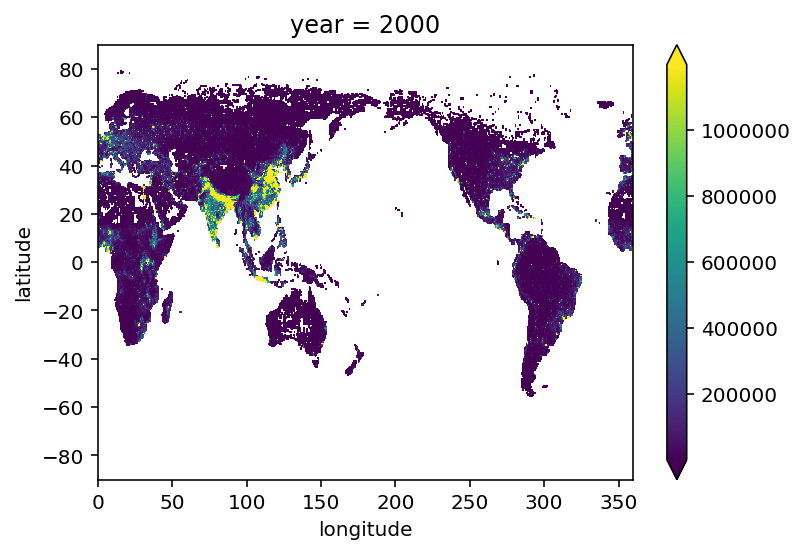

In [95]:
with population_tools.PopulationProjector('histsoc_population_0.5deg_1861-2005_.nc', mask_empty=True) as pop:
    pop.data.sel(year=2000).plot(robust=True)